In [13]:
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
data=pd.read_csv('Mall_Customers.csv')

In [15]:
X=data.iloc[:,[3,4]].values

In [16]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [17]:
aff = AffinityPropagation()
labels = aff.fit_predict(X)

In [18]:
df=data
df['Cluster_group']=labels
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


## Affinity Propagation

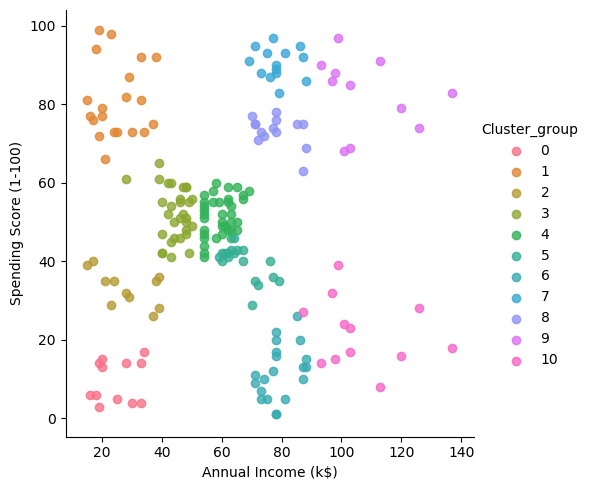

In [19]:
sns.lmplot(data=df,x=df.columns[3],y=df.columns[4],hue=df.columns[5],facet_kws={'legend_out': True},fit_reg=False)
plt.show()

### Mean Shift

In [20]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift(bandwidth=2.0)
labels = mean_shift.fit_predict(X)

In [21]:
df['Cluster_group']=labels

In [11]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


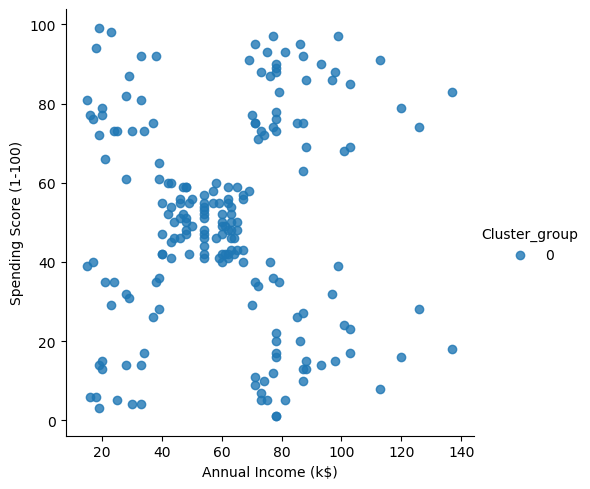

In [22]:
sns.lmplot(data=df,x=df.columns[3],y=df.columns[4],hue=df.columns[5],facet_kws={'legend_out': True},fit_reg=False)
plt.show()

### Spectral Clustering

In [23]:
from sklearn.cluster import SpectralClustering

In [27]:
spectral_clustering = SpectralClustering(n_clusters=10)
labels_spectral = spectral_clustering.fit_predict(X)

In [28]:
df['Cluster_group_Spectral']=labels_spectral

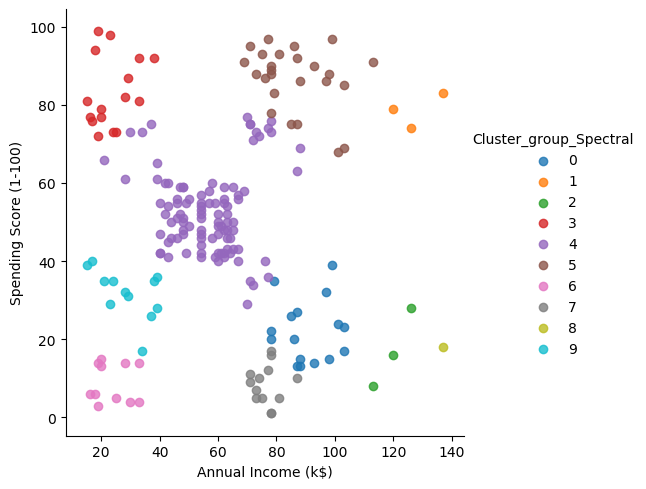

In [29]:
sns.lmplot(data=df,x=df.columns[3],y=df.columns[4],hue=df.columns[6],facet_kws={'legend_out': True},fit_reg=False)
plt.show()

### KMeans

In [ ]:
import pandas as pd
from sklearn.cluster import SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV
file_path = 'your_dataset.csv'  # Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv(file_path)

# Select numerical features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Convert features to a NumPy array
features_array = features.to_numpy()

# Standardize the features (important for clustering)
scaler = StandardScaler()
features_std = scaler.fit_transform(features_array)

# Apply Spectral Clustering
n_clusters_spectral = 3  # Set the number of clusters for Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=n_clusters_spectral, random_state=42)
labels_spectral = spectral_clustering.fit_predict(features_std)

# Apply Mean Shift Clustering
mean_shift_bandwidth = 2.0  # Set the bandwidth parameter for Mean Shift Clustering
mean_shift = MeanShift(bandwidth=mean_shift_bandwidth)
labels_mean_shift = mean_shift.fit_predict(features_std)

# Add the cluster labels to the DataFrame
df['Cluster_Spectral'] = labels_spectral
df['Cluster_MeanShift'] = labels_mean_shift

# Display the resulting DataFrame
print(df)

# Visualize Spectral Clustering (2D scatter plot for two features)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cluster in range(n_clusters_spectral):
    cluster_points = df[df['Cluster_Spectral'] == cluster]
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spectral Clustering')
plt.legend()

# Visualize Mean Shift Clustering (2D scatter plot for two features)
plt.subplot(1, 2, 2)
unique_clusters_mean_shift = np.unique(labels_mean_shift)
colors_mean_shift = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters_mean_shift)))
for cluster, color in zip(unique_clusters_mean_shift, colors_mean_shift):
    cluster_points = df[df['Cluster_MeanShift'] == cluster]
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'],
                color=color, label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mean Shift Clustering')
plt.legend()

plt.tight_layout()
plt.show()
